In [12]:
# Data frames COVID19 Spain

import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


# Downloading data in zip format, extracting and charging data

df = pd.read_csv("https://cnecovid.isciii.es/covid19/resources/datos_ccaas.csv")

#df.columns

# Reindexing index dataframe

def reindex(df):
    df.index = [i for i in range(len(df.fecha))]
    return df

# Creating a data frame for each region


def region(x,df):
    if x in df.ccaa_iso.values:
        return reindex(df[df['ccaa_iso'] == x])
    

df['fecha'] = pd.to_datetime(df.fecha) 

plt.rcParams['figure.figsize'] = [70, 35]



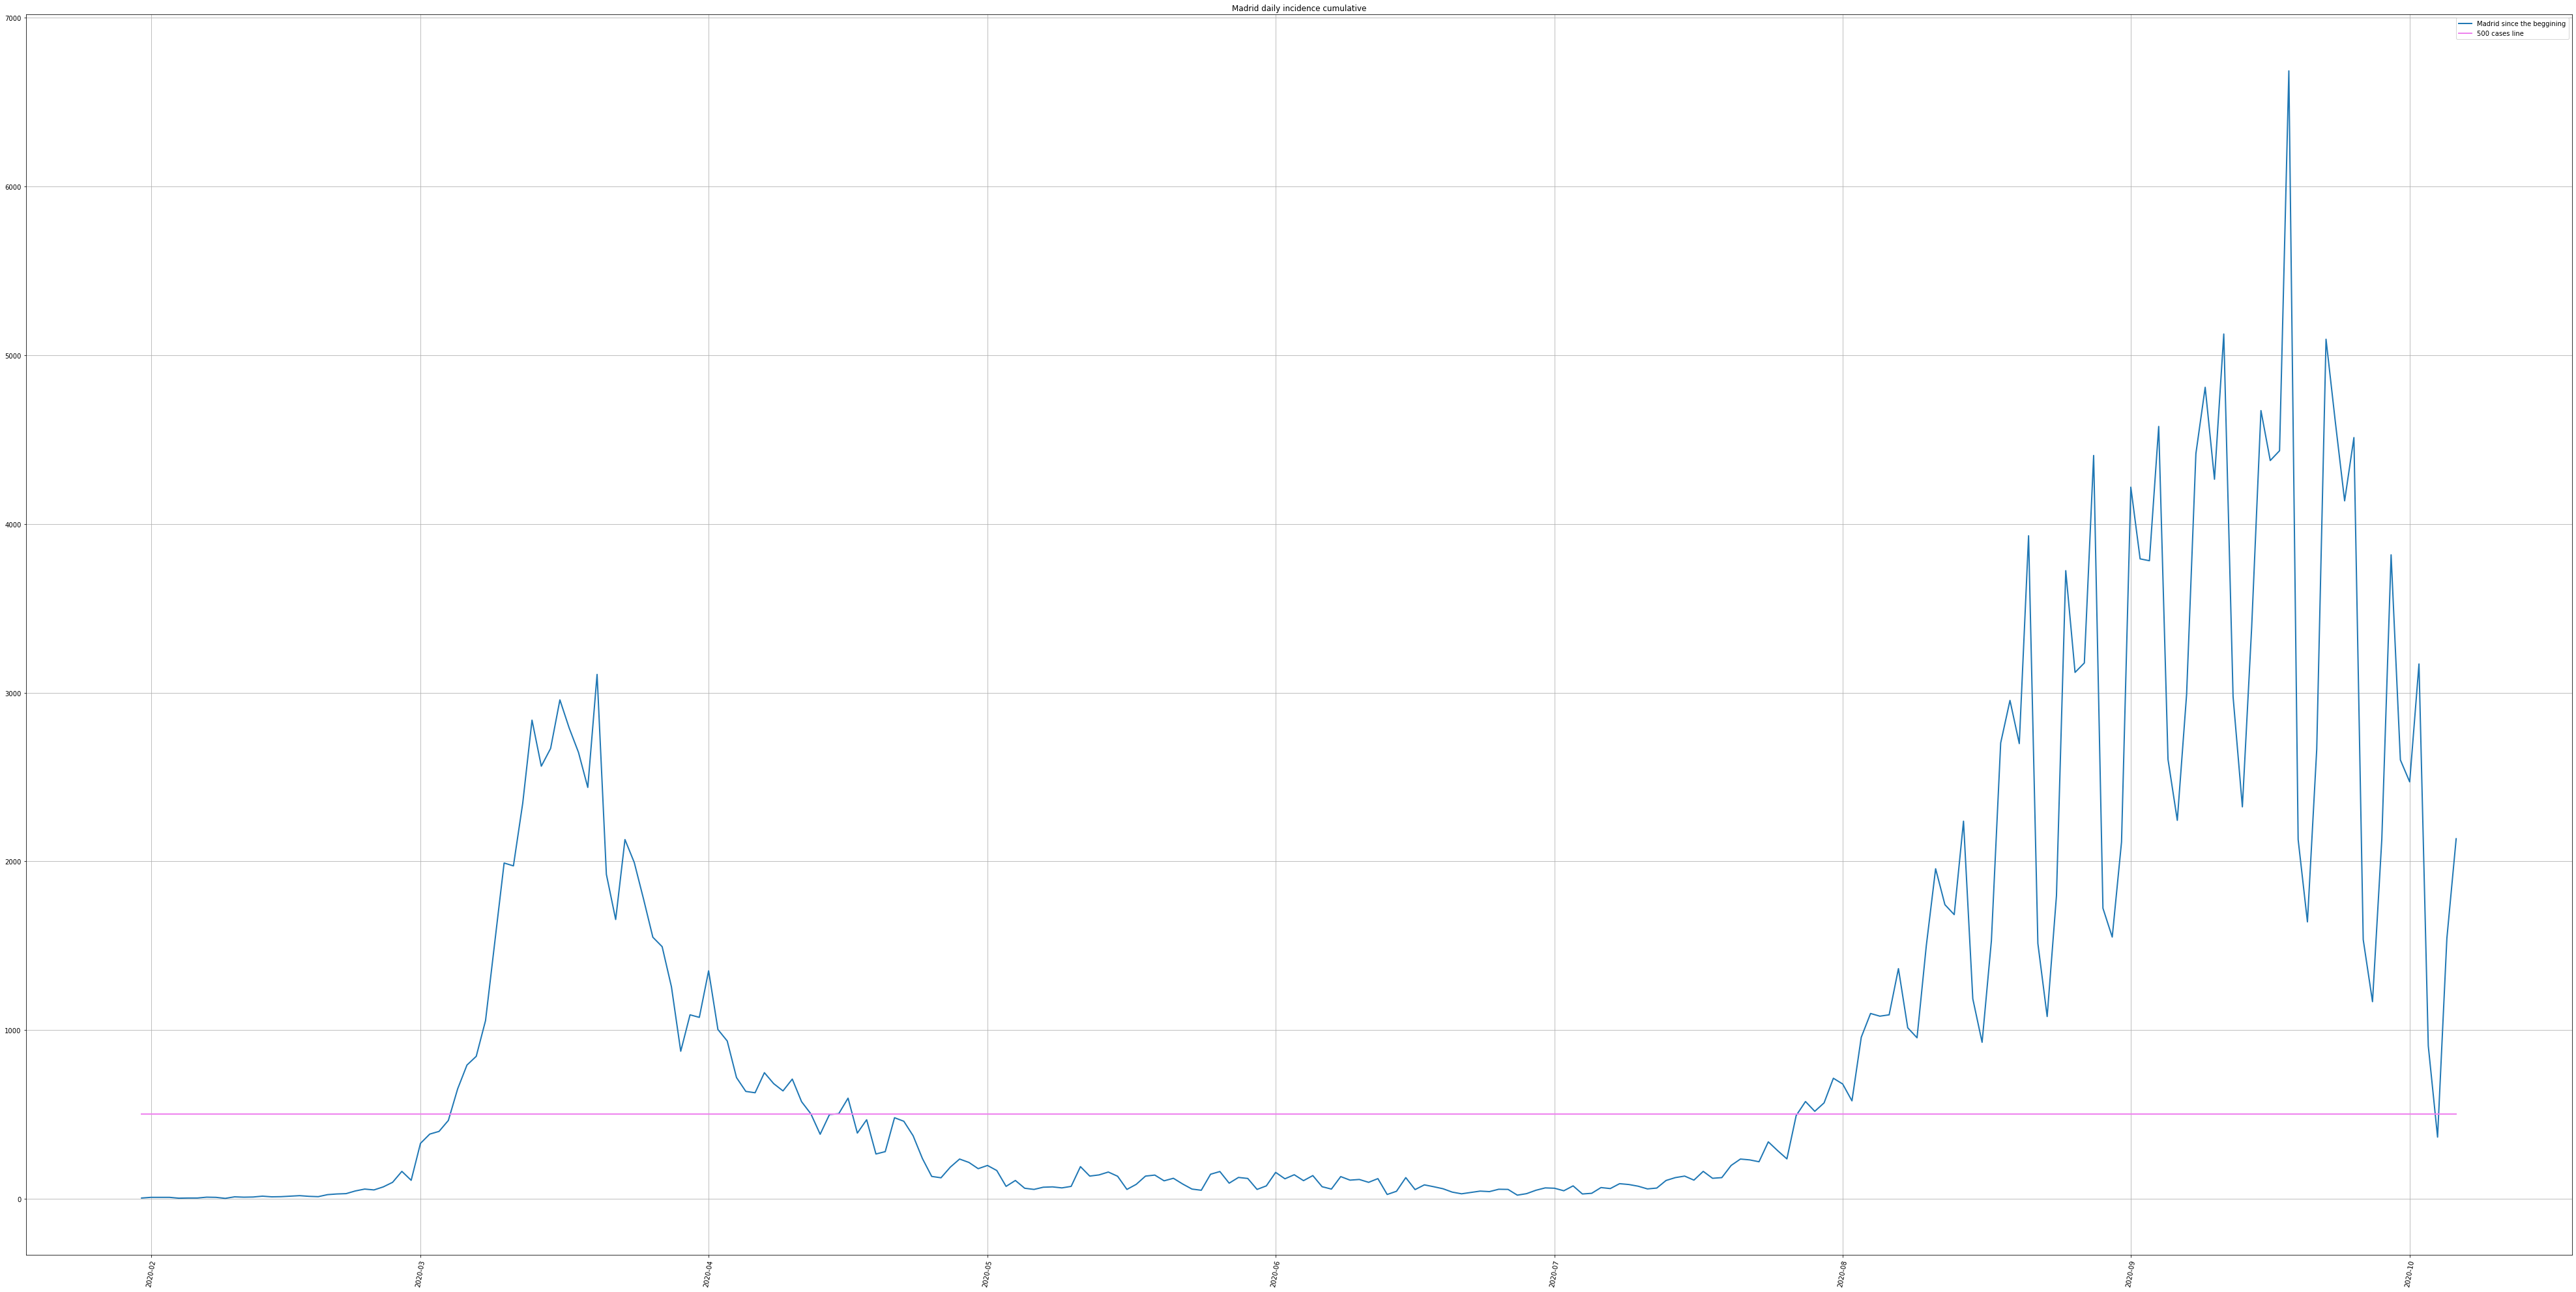

In [13]:
# Function extracting a data frame for a particular region

from scipy.interpolate import interp1d

# MD Madrid, CN Canarias and NC Navarra

Madriddf = region('MD',df).iloc[:-1]
Canariasdf = region('CN',df).iloc[:-1]
Navarradf = region('NC',df).iloc[:-1]

# Madriddf = Madriddf.iloc[:-1] with this code we delete the last row
# This is the zero row from today, this modifies the graph.

z = (len(Madriddf.fecha))*[500]


plt.title('Madrid daily incidence cumulative')
plt.xticks(rotation=80)
plt.plot(Madriddf.fecha,Madriddf.num_casos, linewidth=2.0, label = 'Madrid since the beggining')
plt.plot(Madriddf.fecha,z,'violet',linewidth=2.0, label = '500 cases line')
plt.legend(fontsize = 10)
plt.grid()



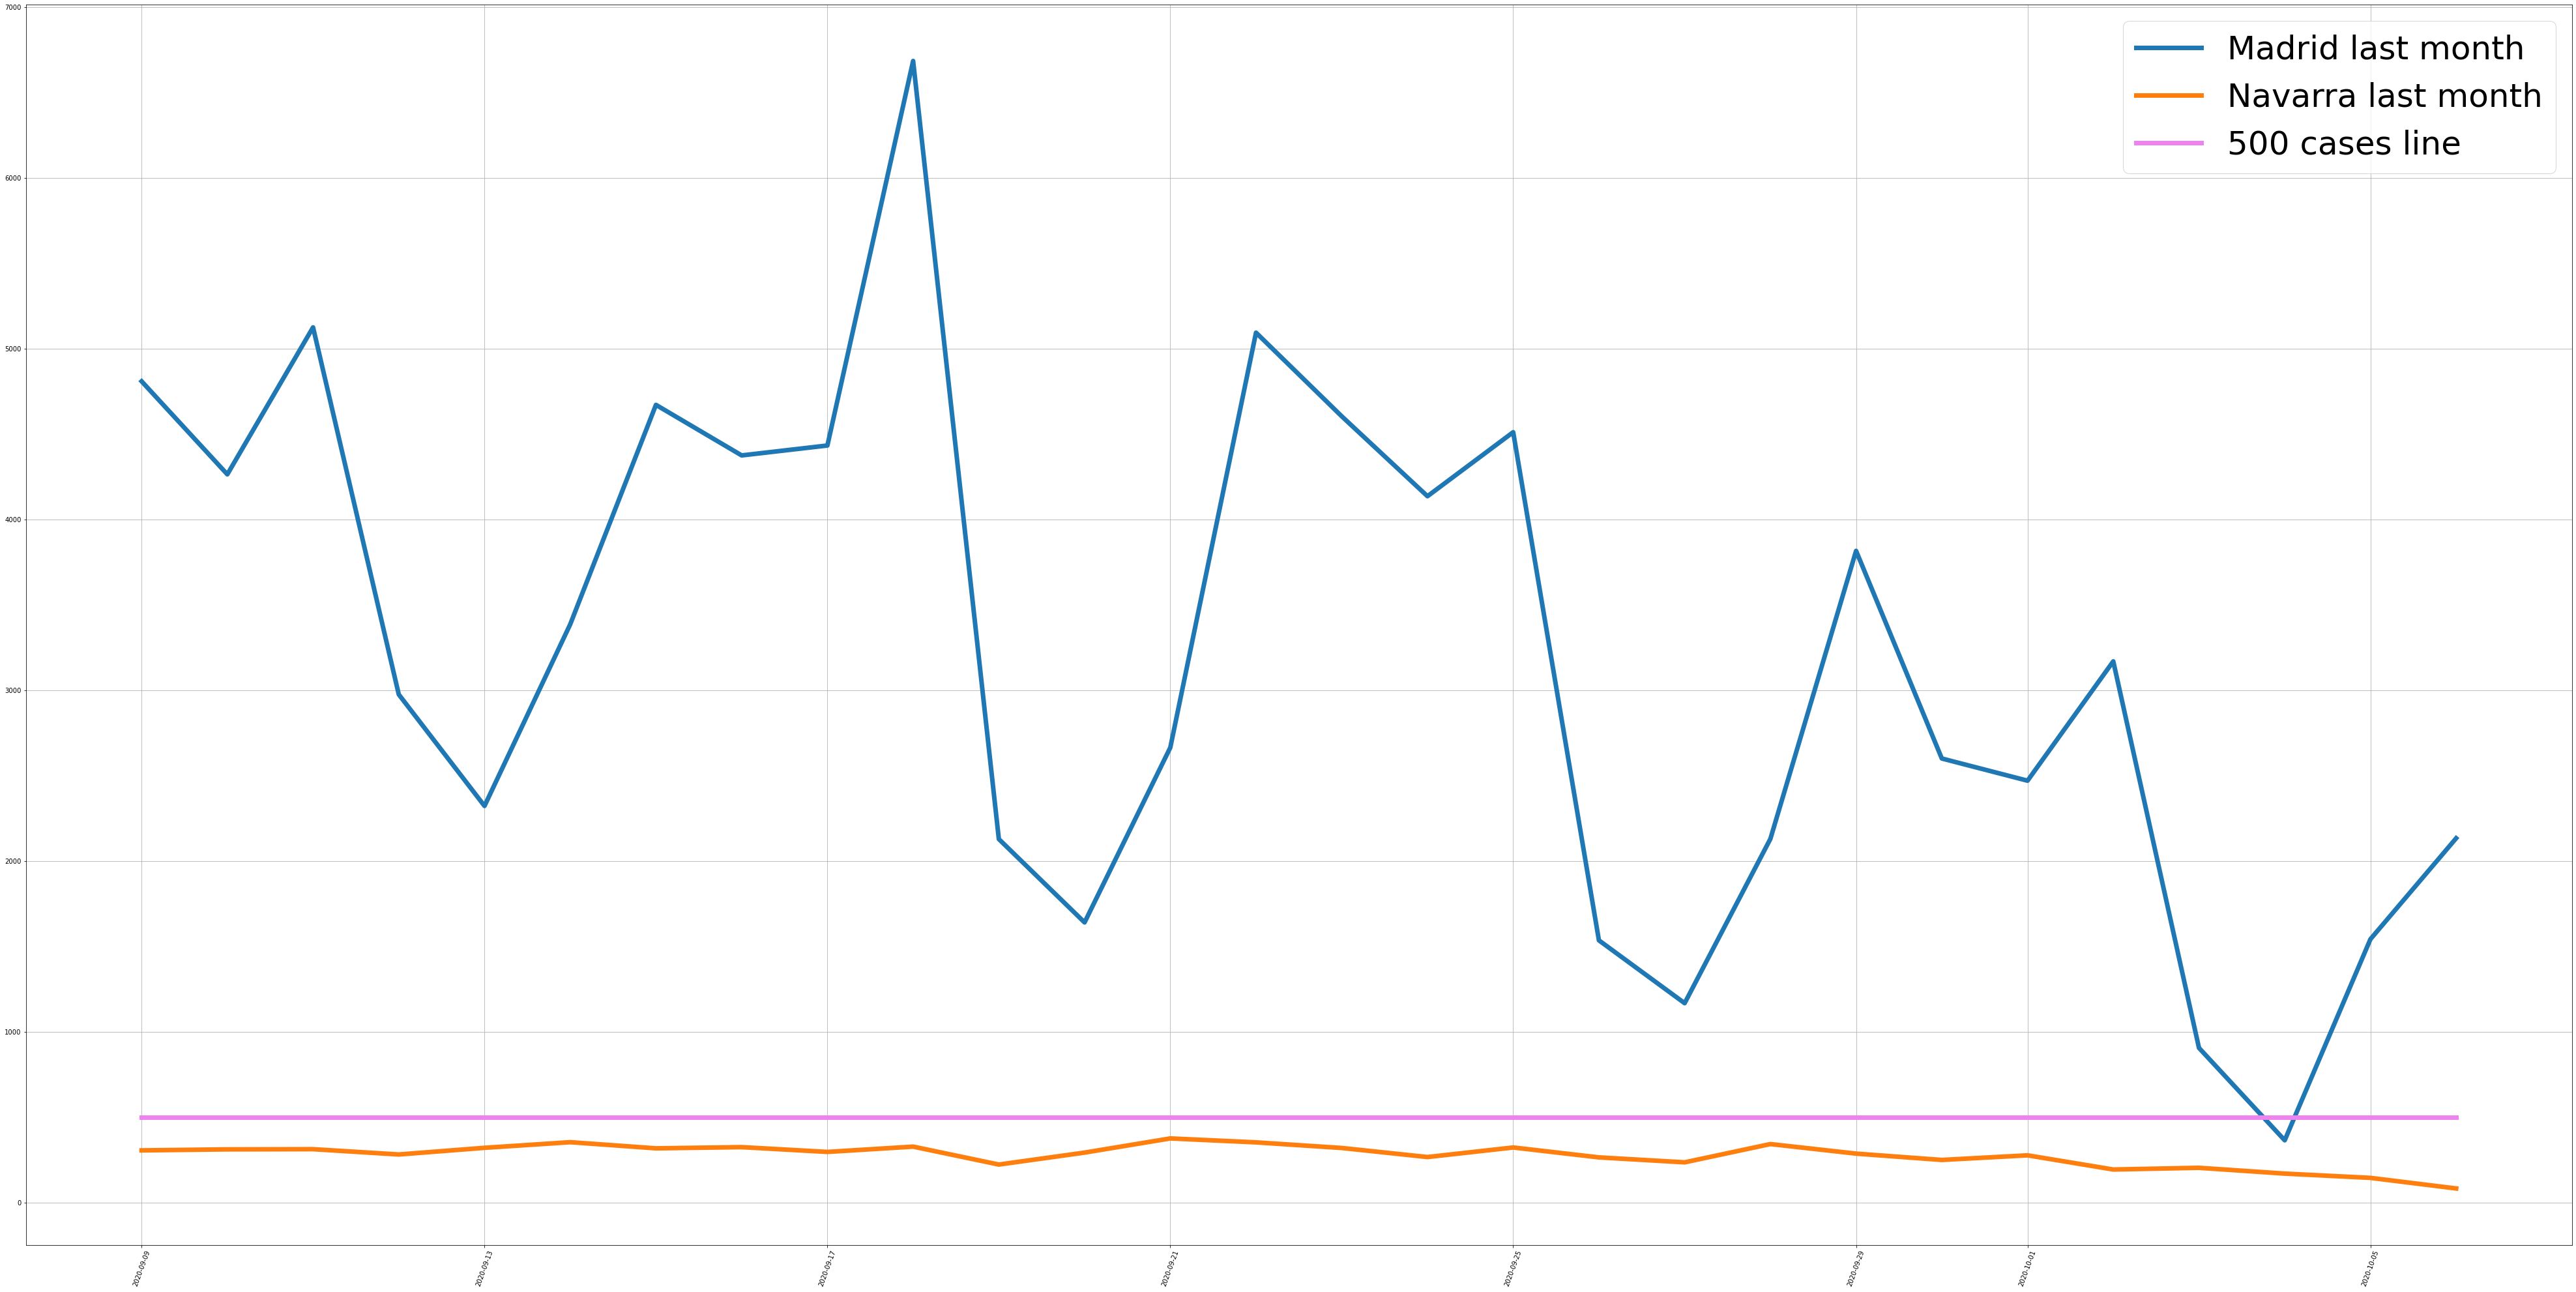

In [14]:
# Last 30 days

def month(df):
    test = df[df.index > (len(df.fecha)-29)]
    x_month = test['fecha']
    test_2 = df[df.index > (len(df.fecha)-29)]
    y_month = test_2['num_casos']
    return x_month,y_month;

def fourteen(df):
    test = df[df.index > (len(df.fecha)-17)].iloc[:-1]
    x_month = test['fecha']
    test_2 = df[df.index > (len(df.fecha)-17)].iloc[:-1]
    y_month = test_2['num_casos']
    return x_month,y_month;

def plot30day(df,lab):
    plt.xticks(rotation=70)
    plt.plot(month(df)[0],month(df)[1],linewidth=7.0, label = str(lab))
    
def scatterplot30day(df,lab):
    plt.xticks(rotation=70)
    plt.scatter(month(df)[0],month(df)[1],linewidth=7.0, label = str(lab))

y = (len(month(Madriddf)[0]))*[500]


plot30day(Madriddf,'Madrid last month')
plot30day(Navarradf,'Navarra last month')
plt.plot(month(Madriddf)[0],y, 'violet', linewidth=7.0, label = '500 cases line')
plt.legend(fontsize = 50)
plt.grid()

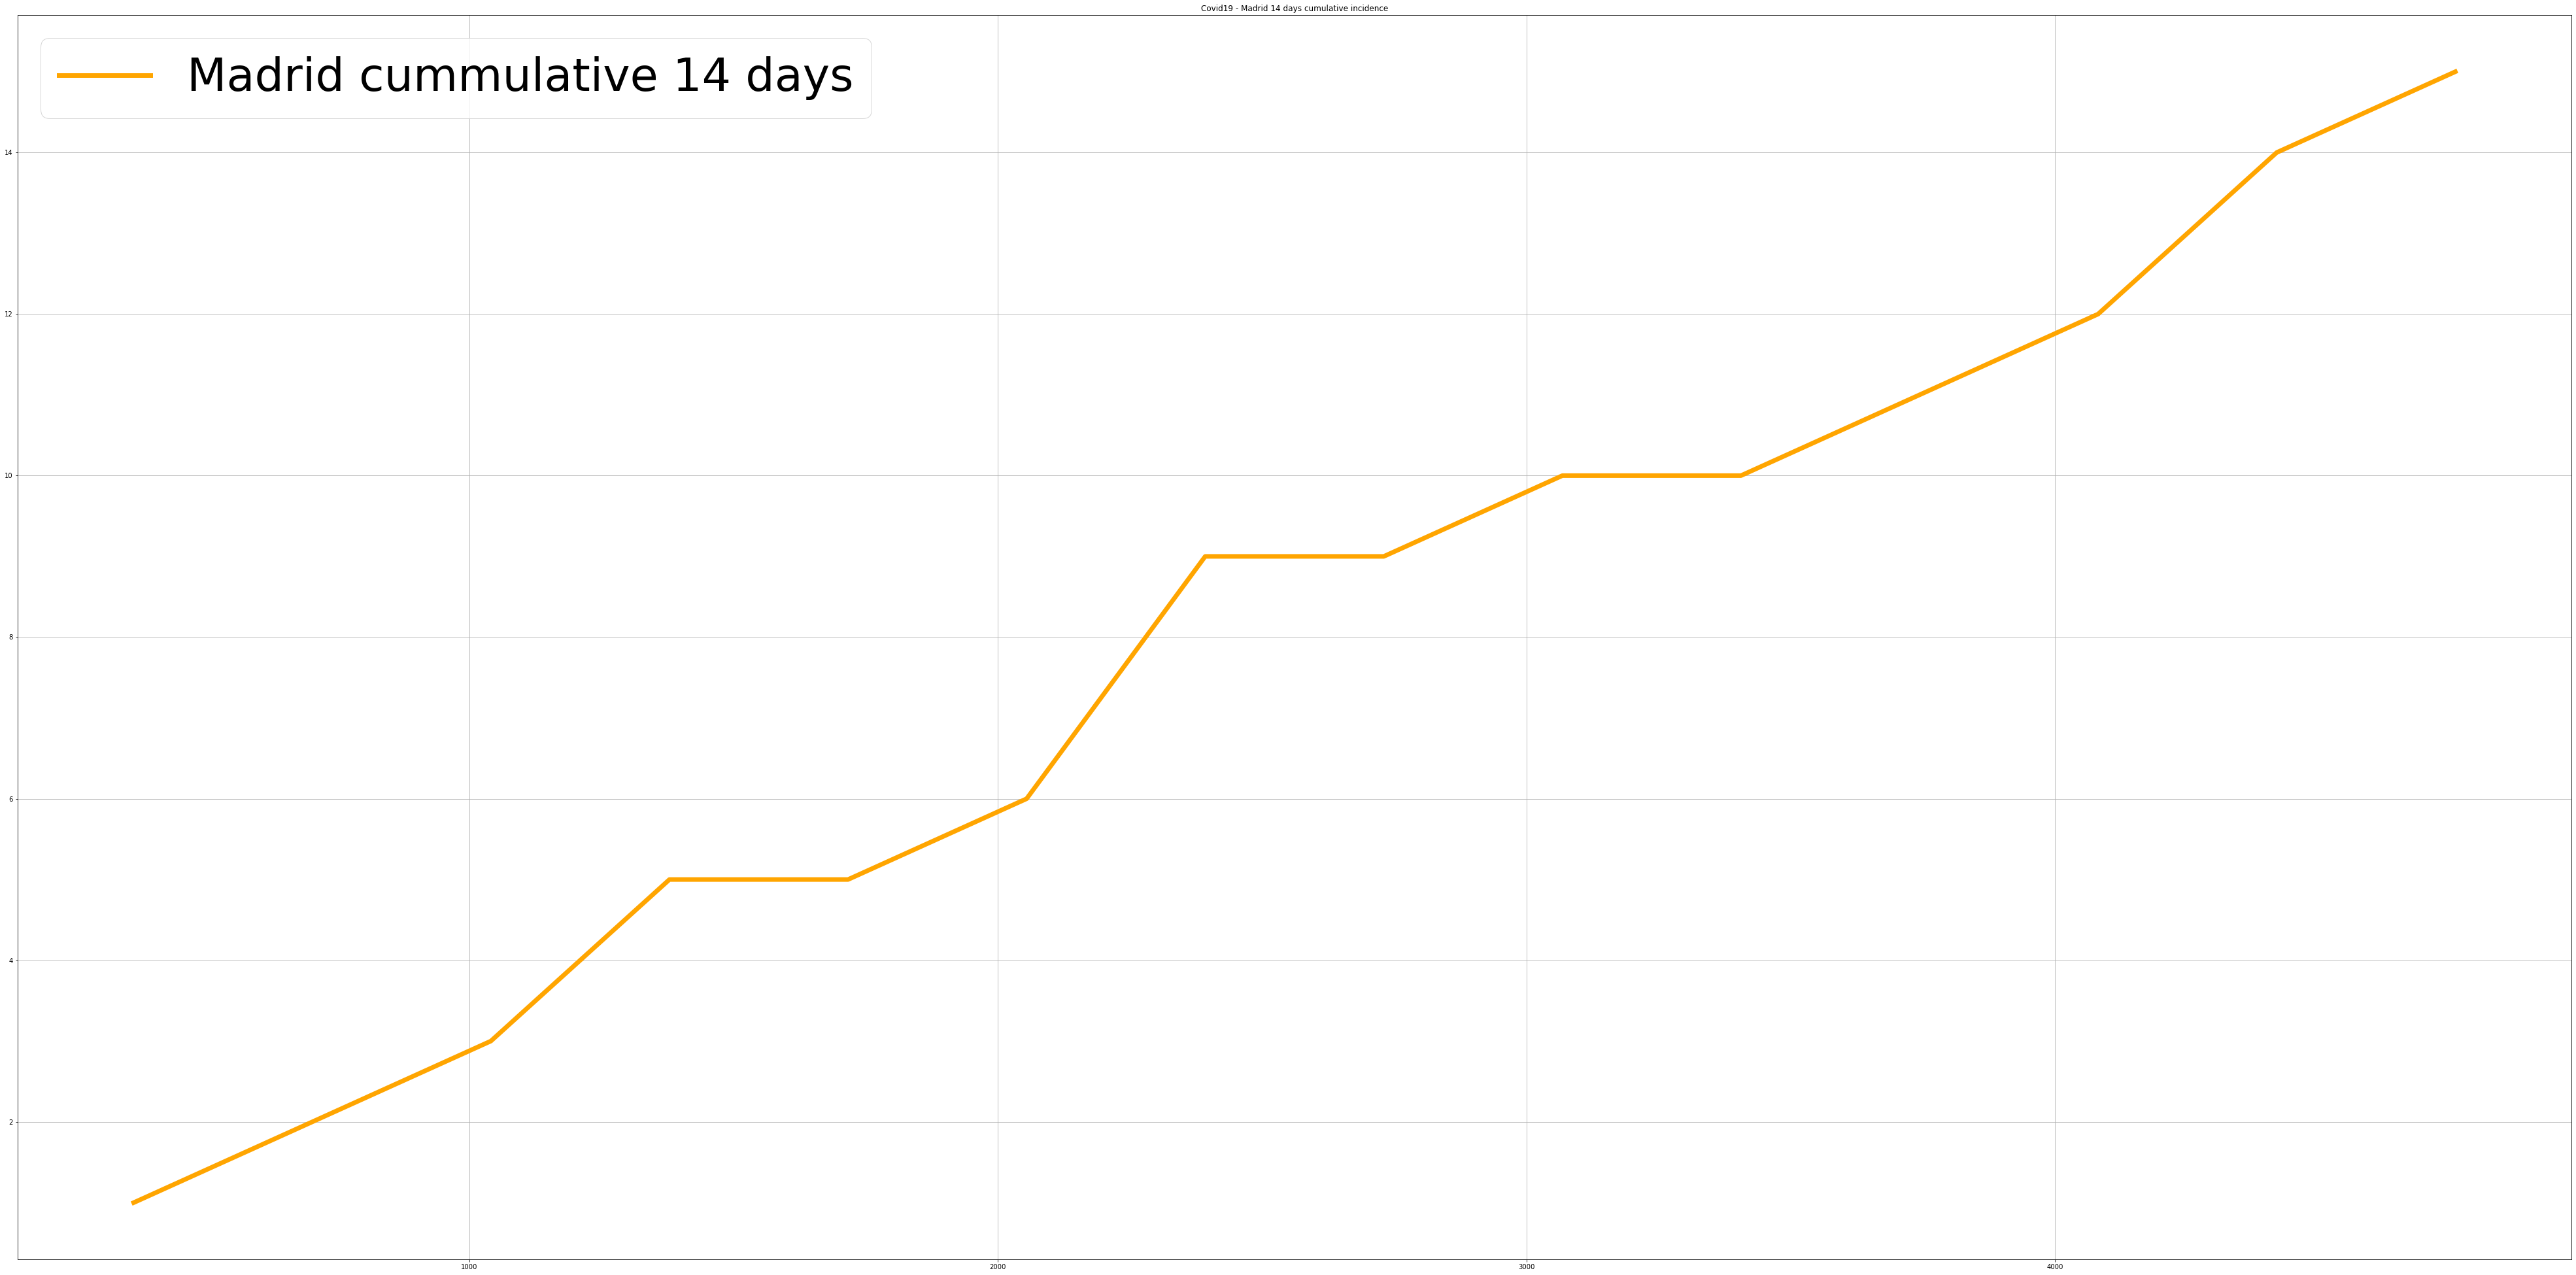

In [15]:
# plt.rcParams['figure.figsize'] = [20, 10]

# 14 day mean plot Madrid ARREGLARLO

plt.title('Covid19 - Madrid 14 days cumulative incidence')
values, base  = np.histogram(fourteen(Madriddf)[1], bins = 14)
cumulative = np.cumsum(values)
plt.plot(base[:-1], cumulative, c='orange',linewidth=7.0, label = 'Madrid cummulative 14 days')
plt.legend(fontsize = 70)
plt.grid()

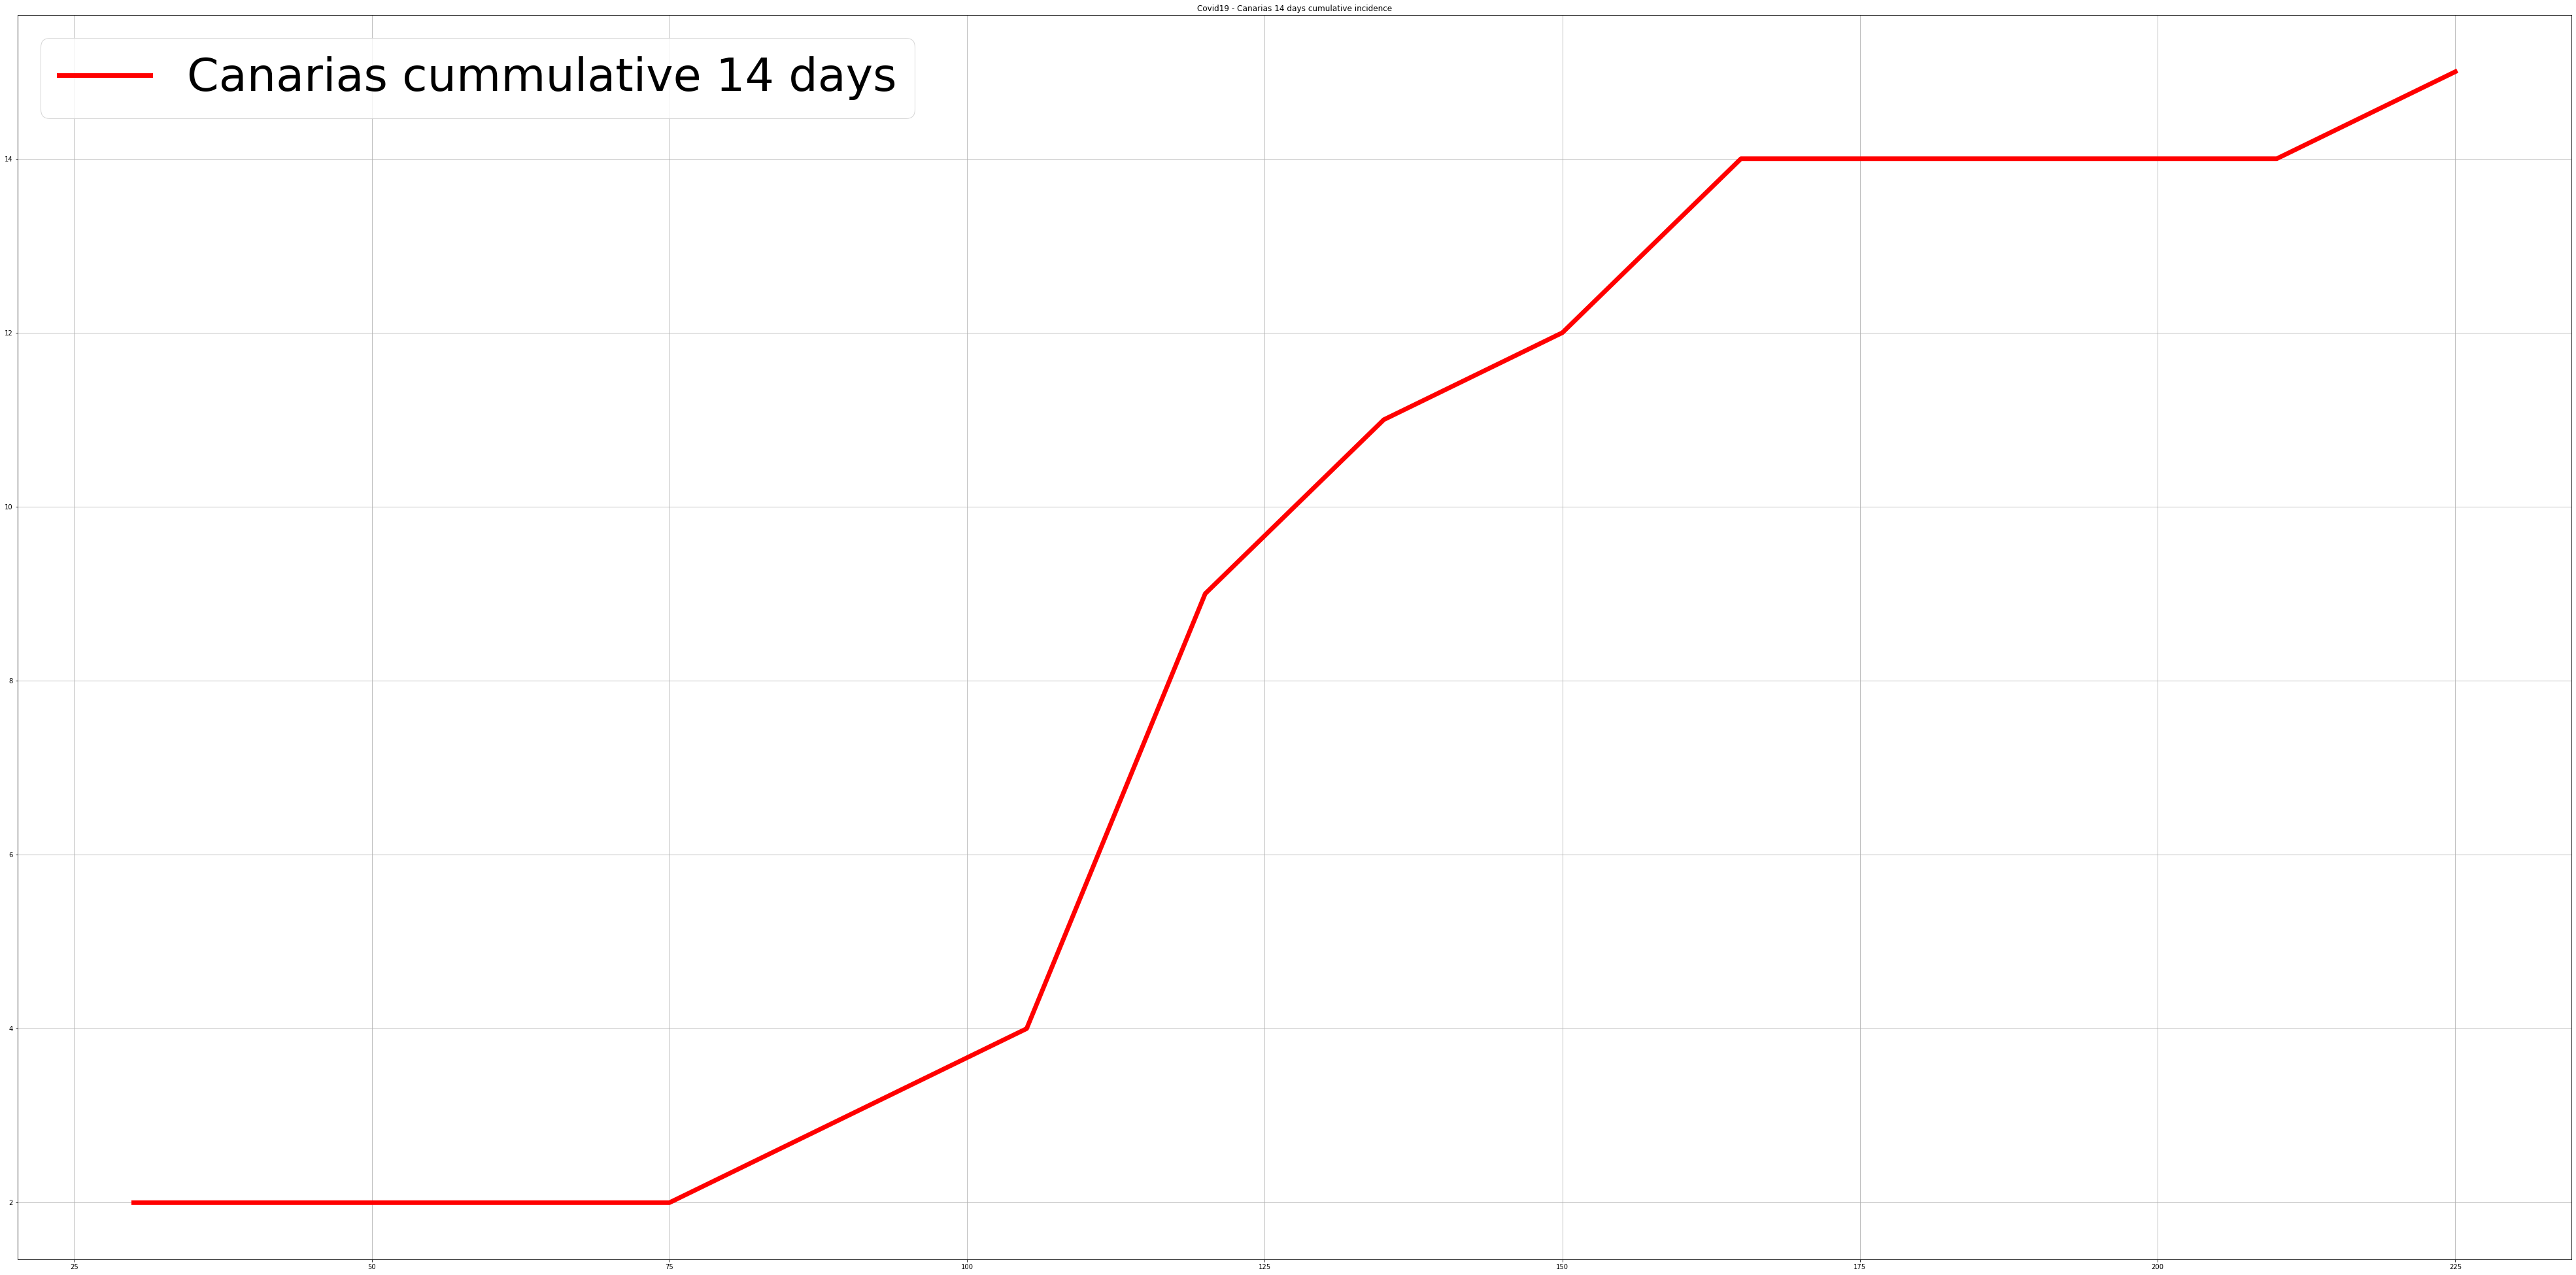

In [16]:
# 14 day mean plot Canarias ARREGLARLO

plt.title('Covid19 - Canarias 14 days cumulative incidence')
values2, base2  = np.histogram(fourteen(Canariasdf)[1], bins = 14)
cumulative2 = np.cumsum(values2)
plt.plot(base2[:-1], cumulative2, c='red',linewidth=7.0, label = 'Canarias cummulative 14 days')
plt.legend(fontsize = 70)
plt.grid()

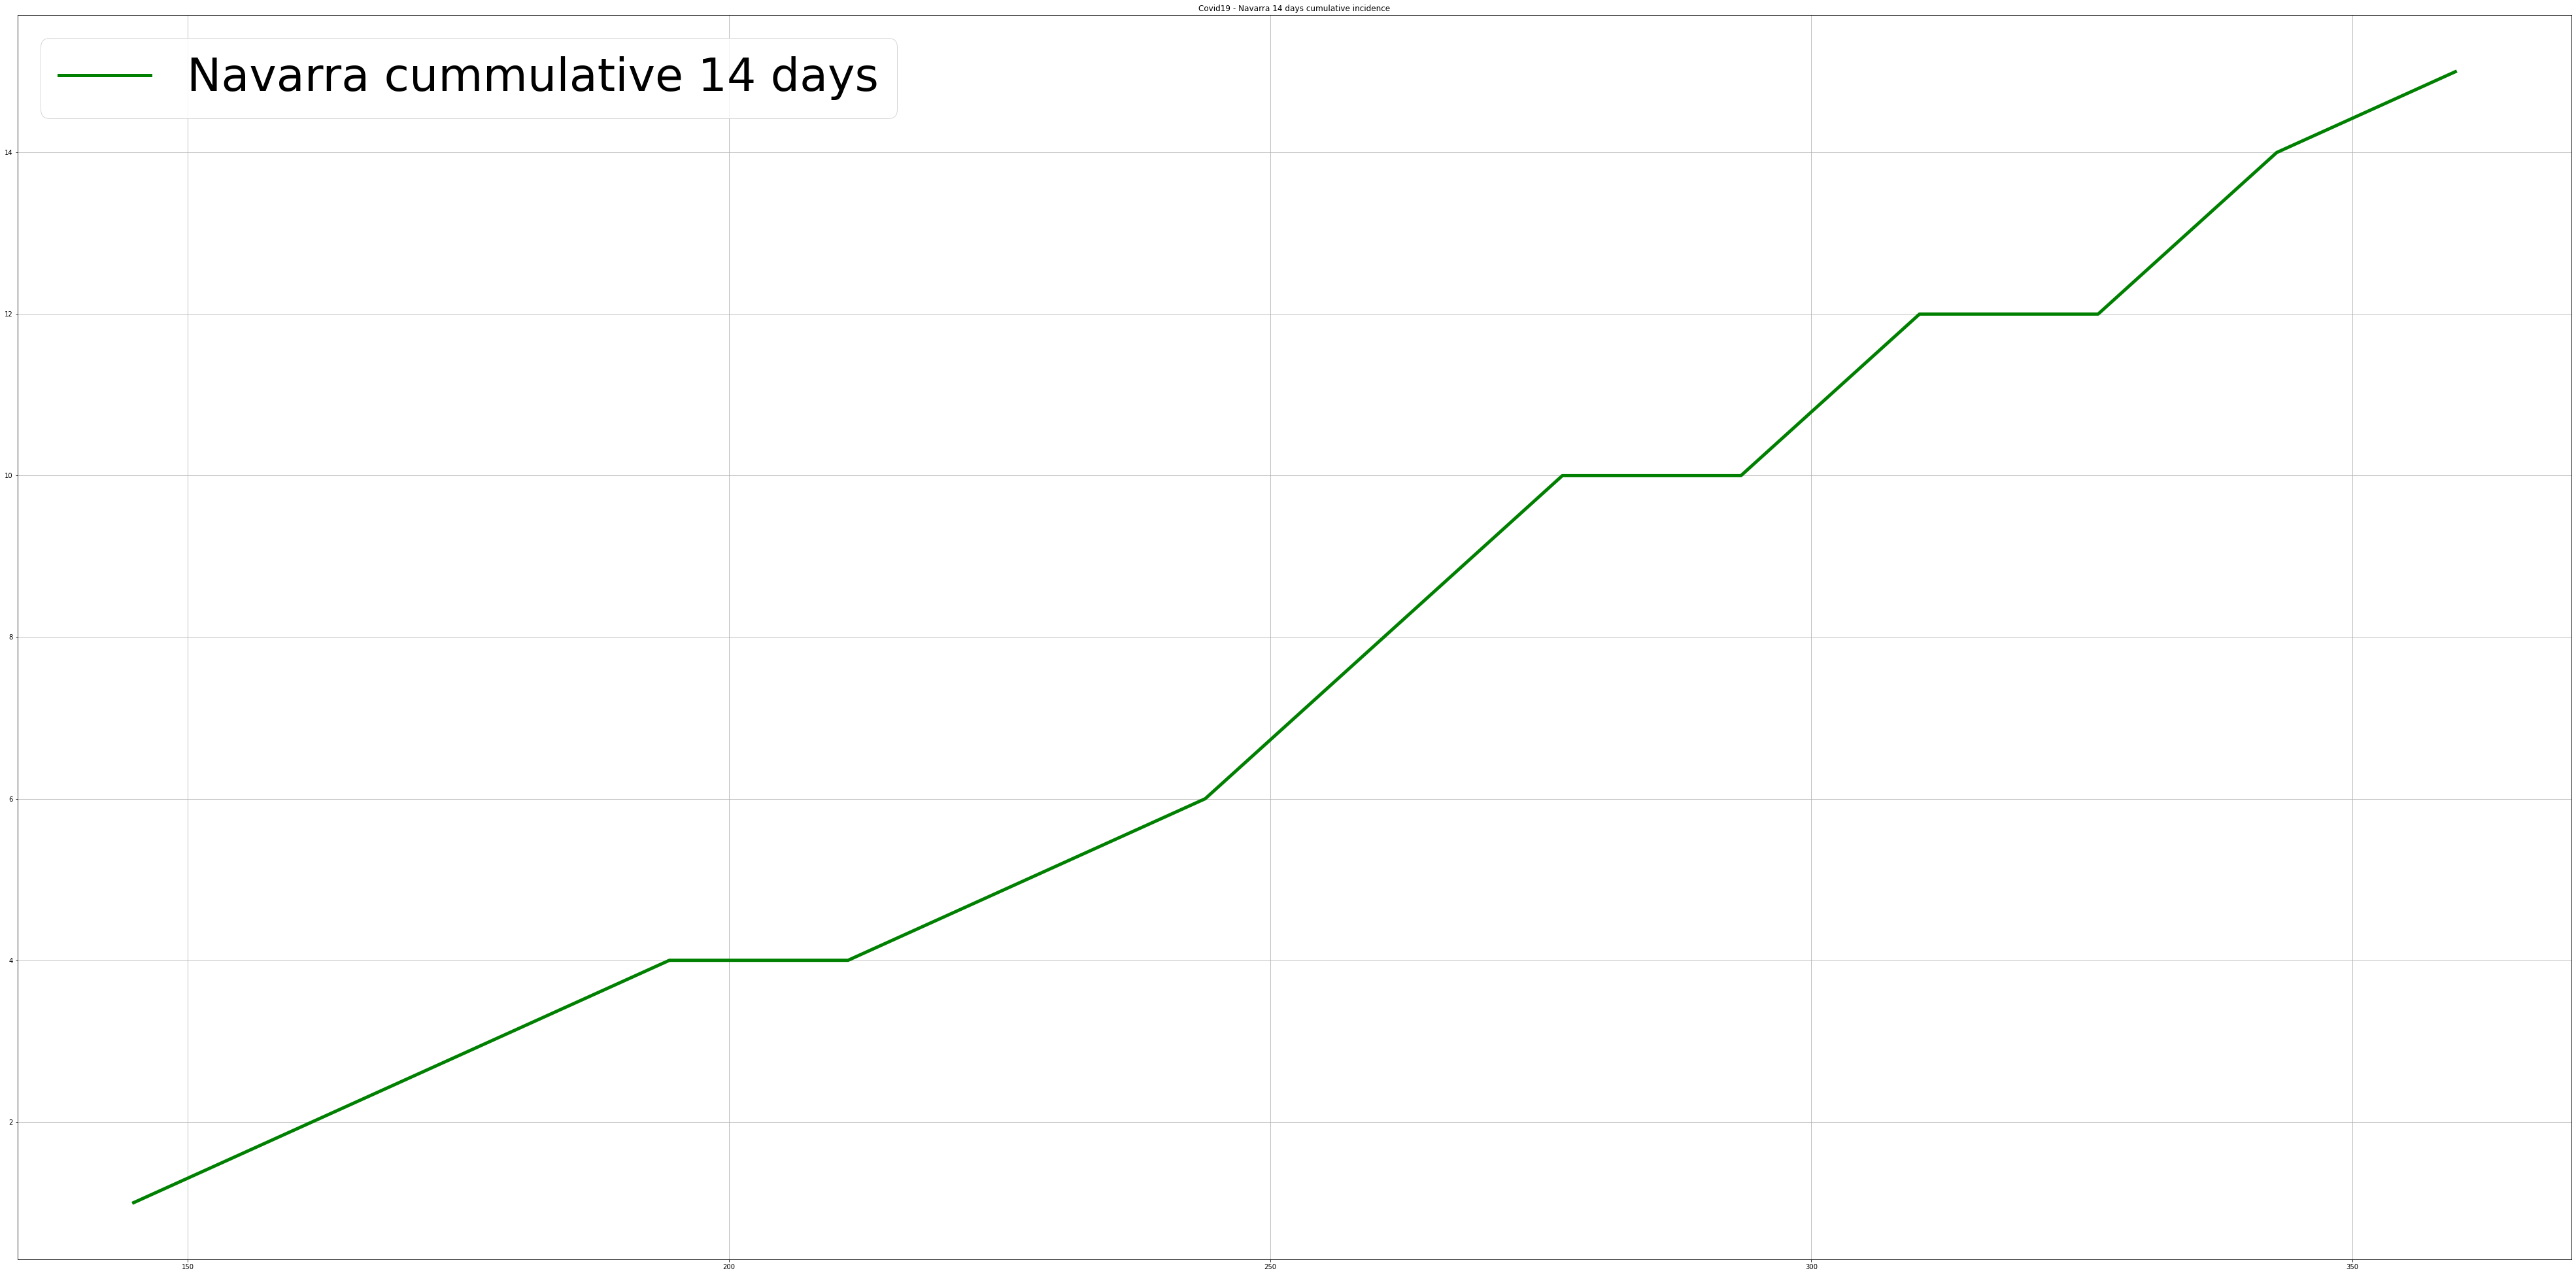

In [17]:
# 14 days mean plot Navarra ARREGLARLO

plt.title('Covid19 - Navarra 14 days cumulative incidence')
values3, base3  = np.histogram(fourteen(Navarradf)[1], bins = 14)
cumulative3 = np.cumsum(values3)
plt.plot(base3[:-1], cumulative3, c='green',linewidth=5.0,label = 'Navarra cummulative 14 days')
plt.legend(fontsize = 70)
plt.grid()

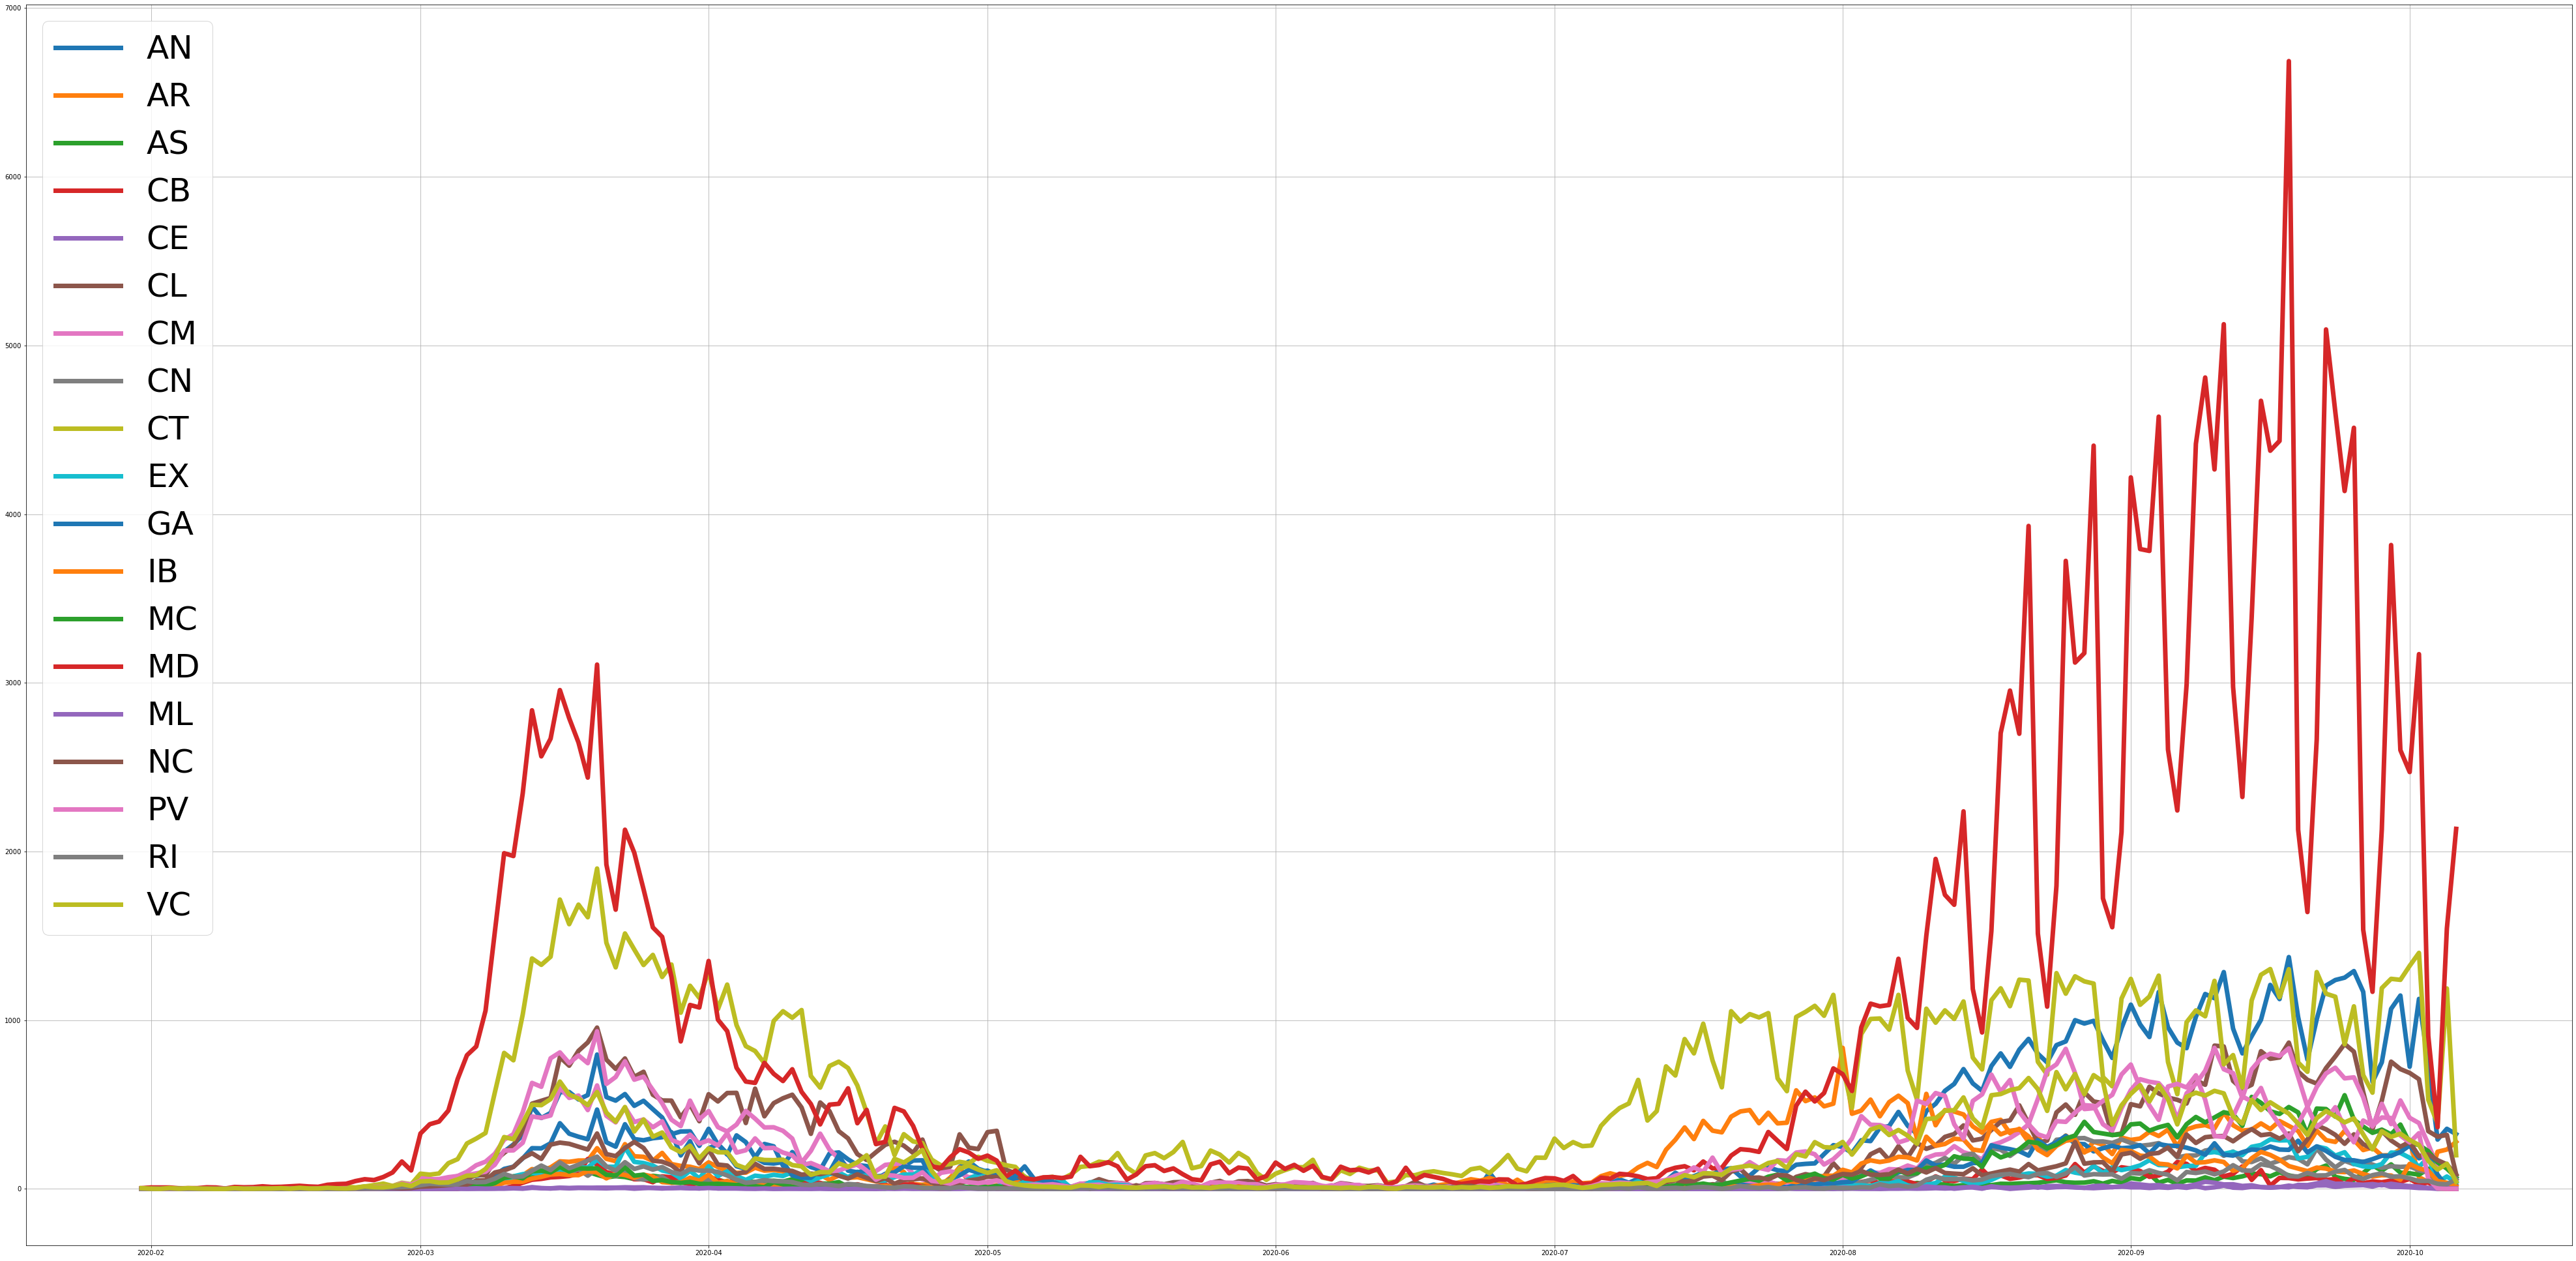

In [18]:
# Plot all the regions since the beggining

variables = pd.unique(df.ccaa_iso)

# Code to create dataframes for each region

#for x in variables:
#      vars()[x] = region(x,df)

for x in variables:
        plt.plot(region(x,df).iloc[:-1].fecha,region(x,df).iloc[:-1].num_casos,linewidth=7.0, label = x)
                
plt.legend(fontsize = 50)
plt.grid()

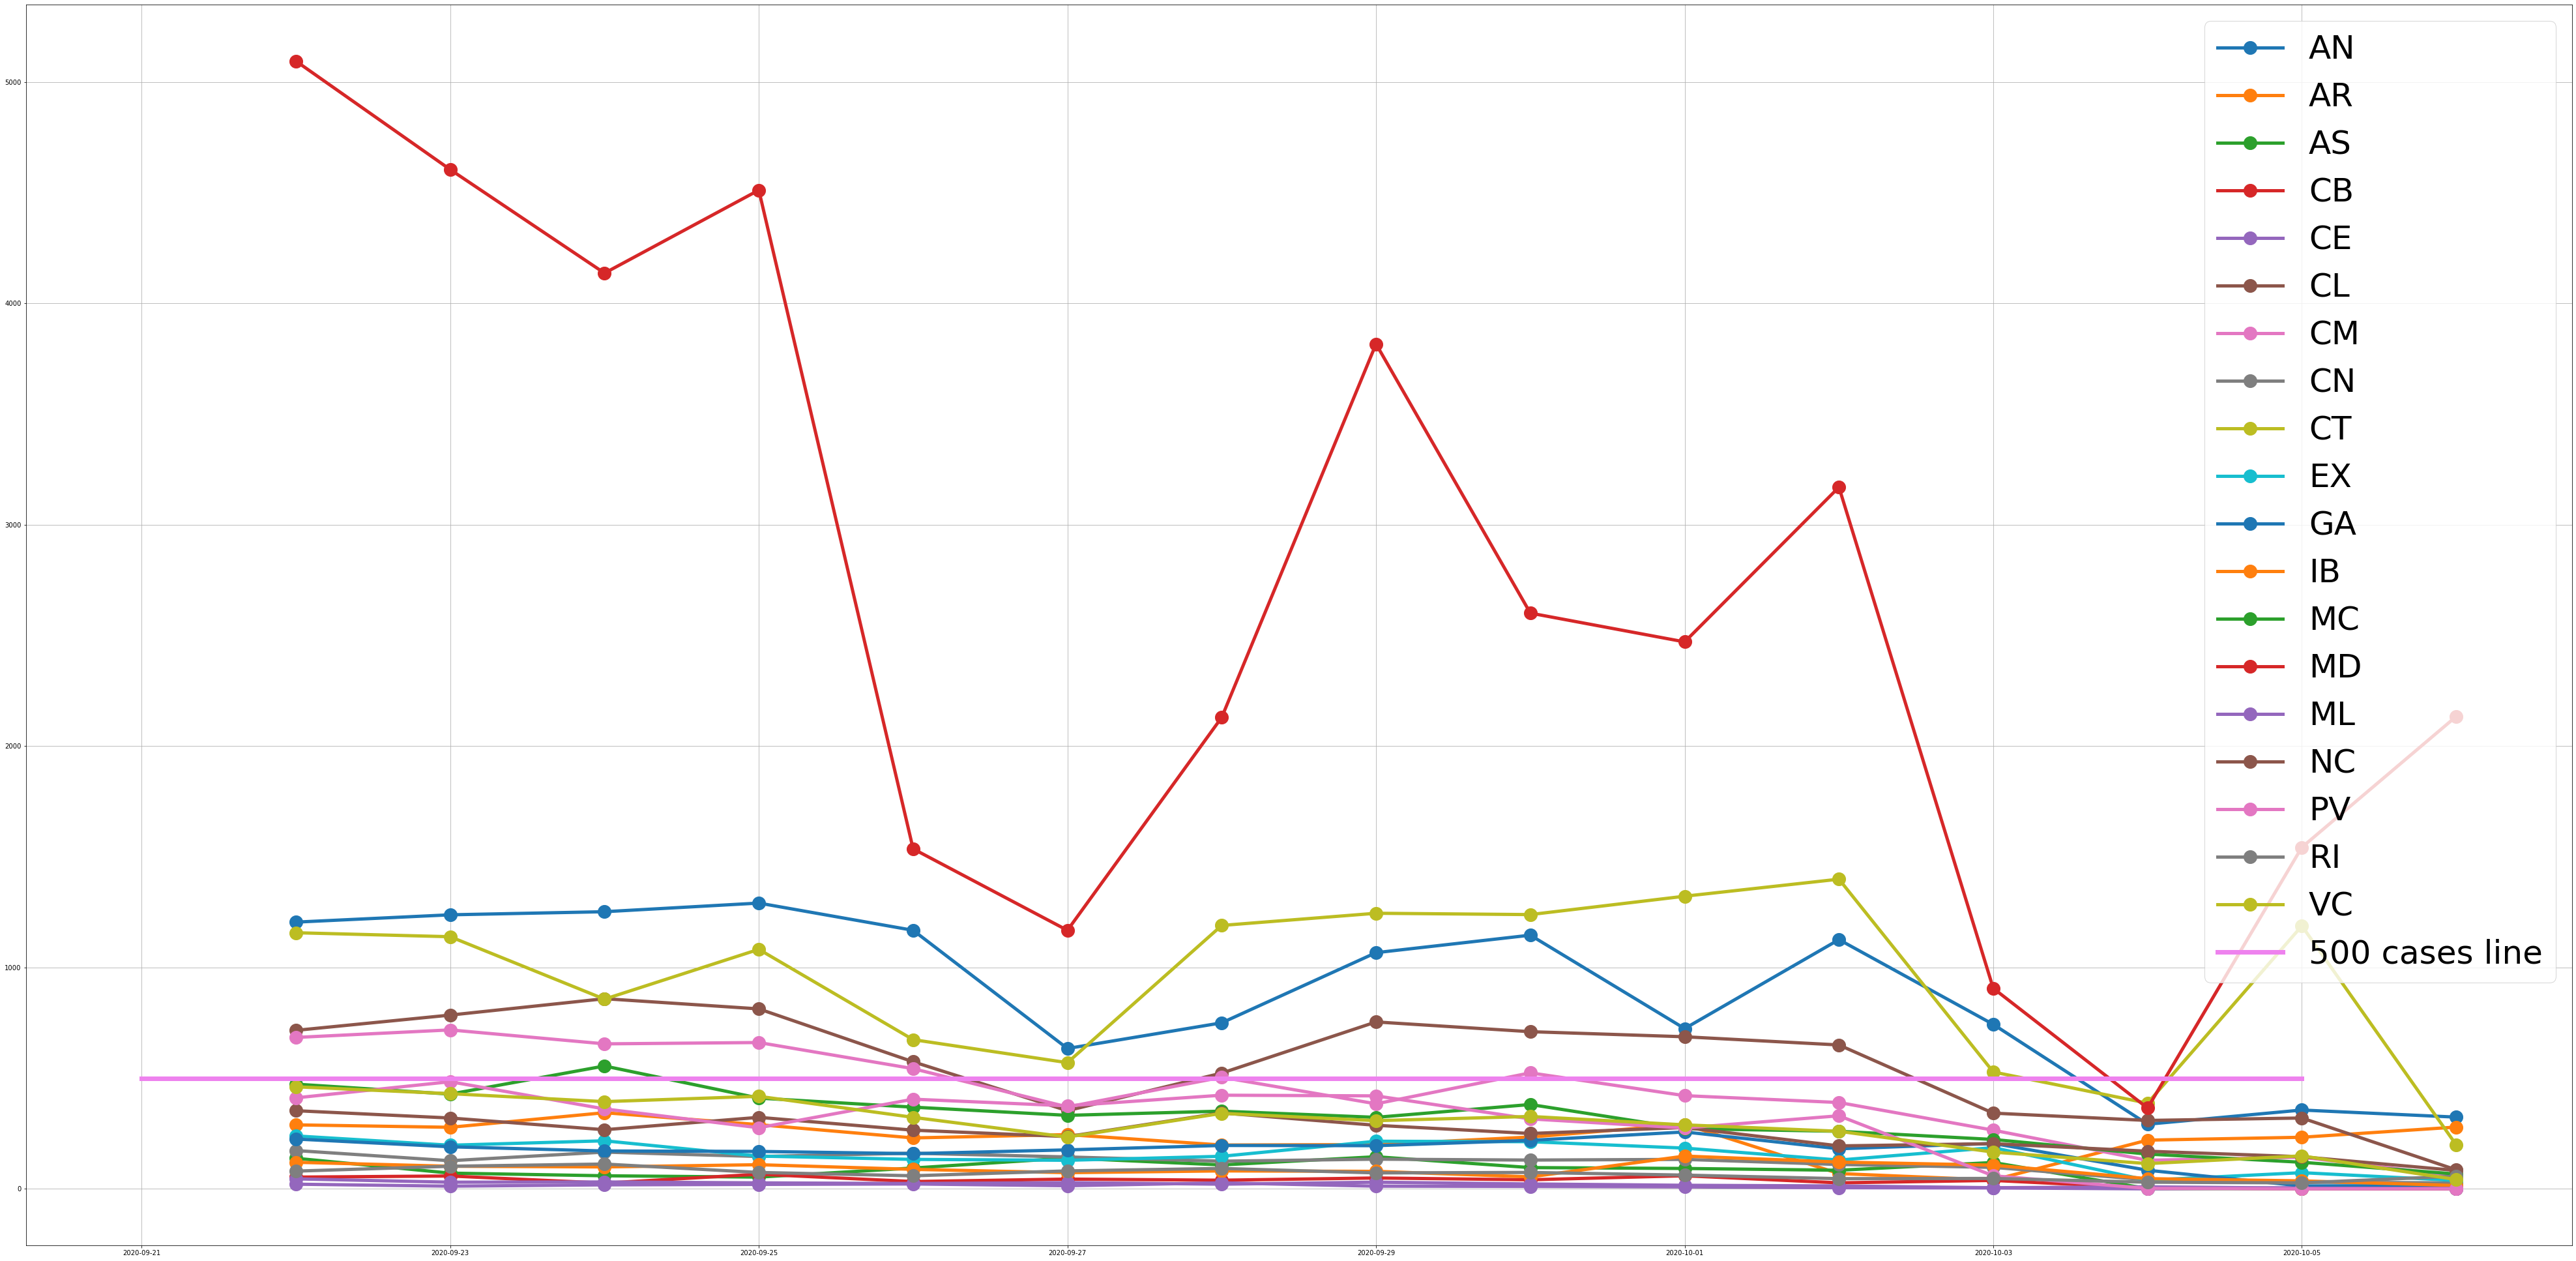

In [19]:
# Plot all the regions 14 days

variables = pd.unique(df.ccaa_iso)


for x in variables:
        z,w = fourteen(region(x,df))
        plt.plot(z,w,linewidth=5.0, label = x,marker = 'o', markersize = 20)

k = 15*[500]
plt.plot(fourteen(Madriddf)[0],k, 'violet', linewidth=7.0, label = '500 cases line')
plt.legend(fontsize = 50)
plt.grid()

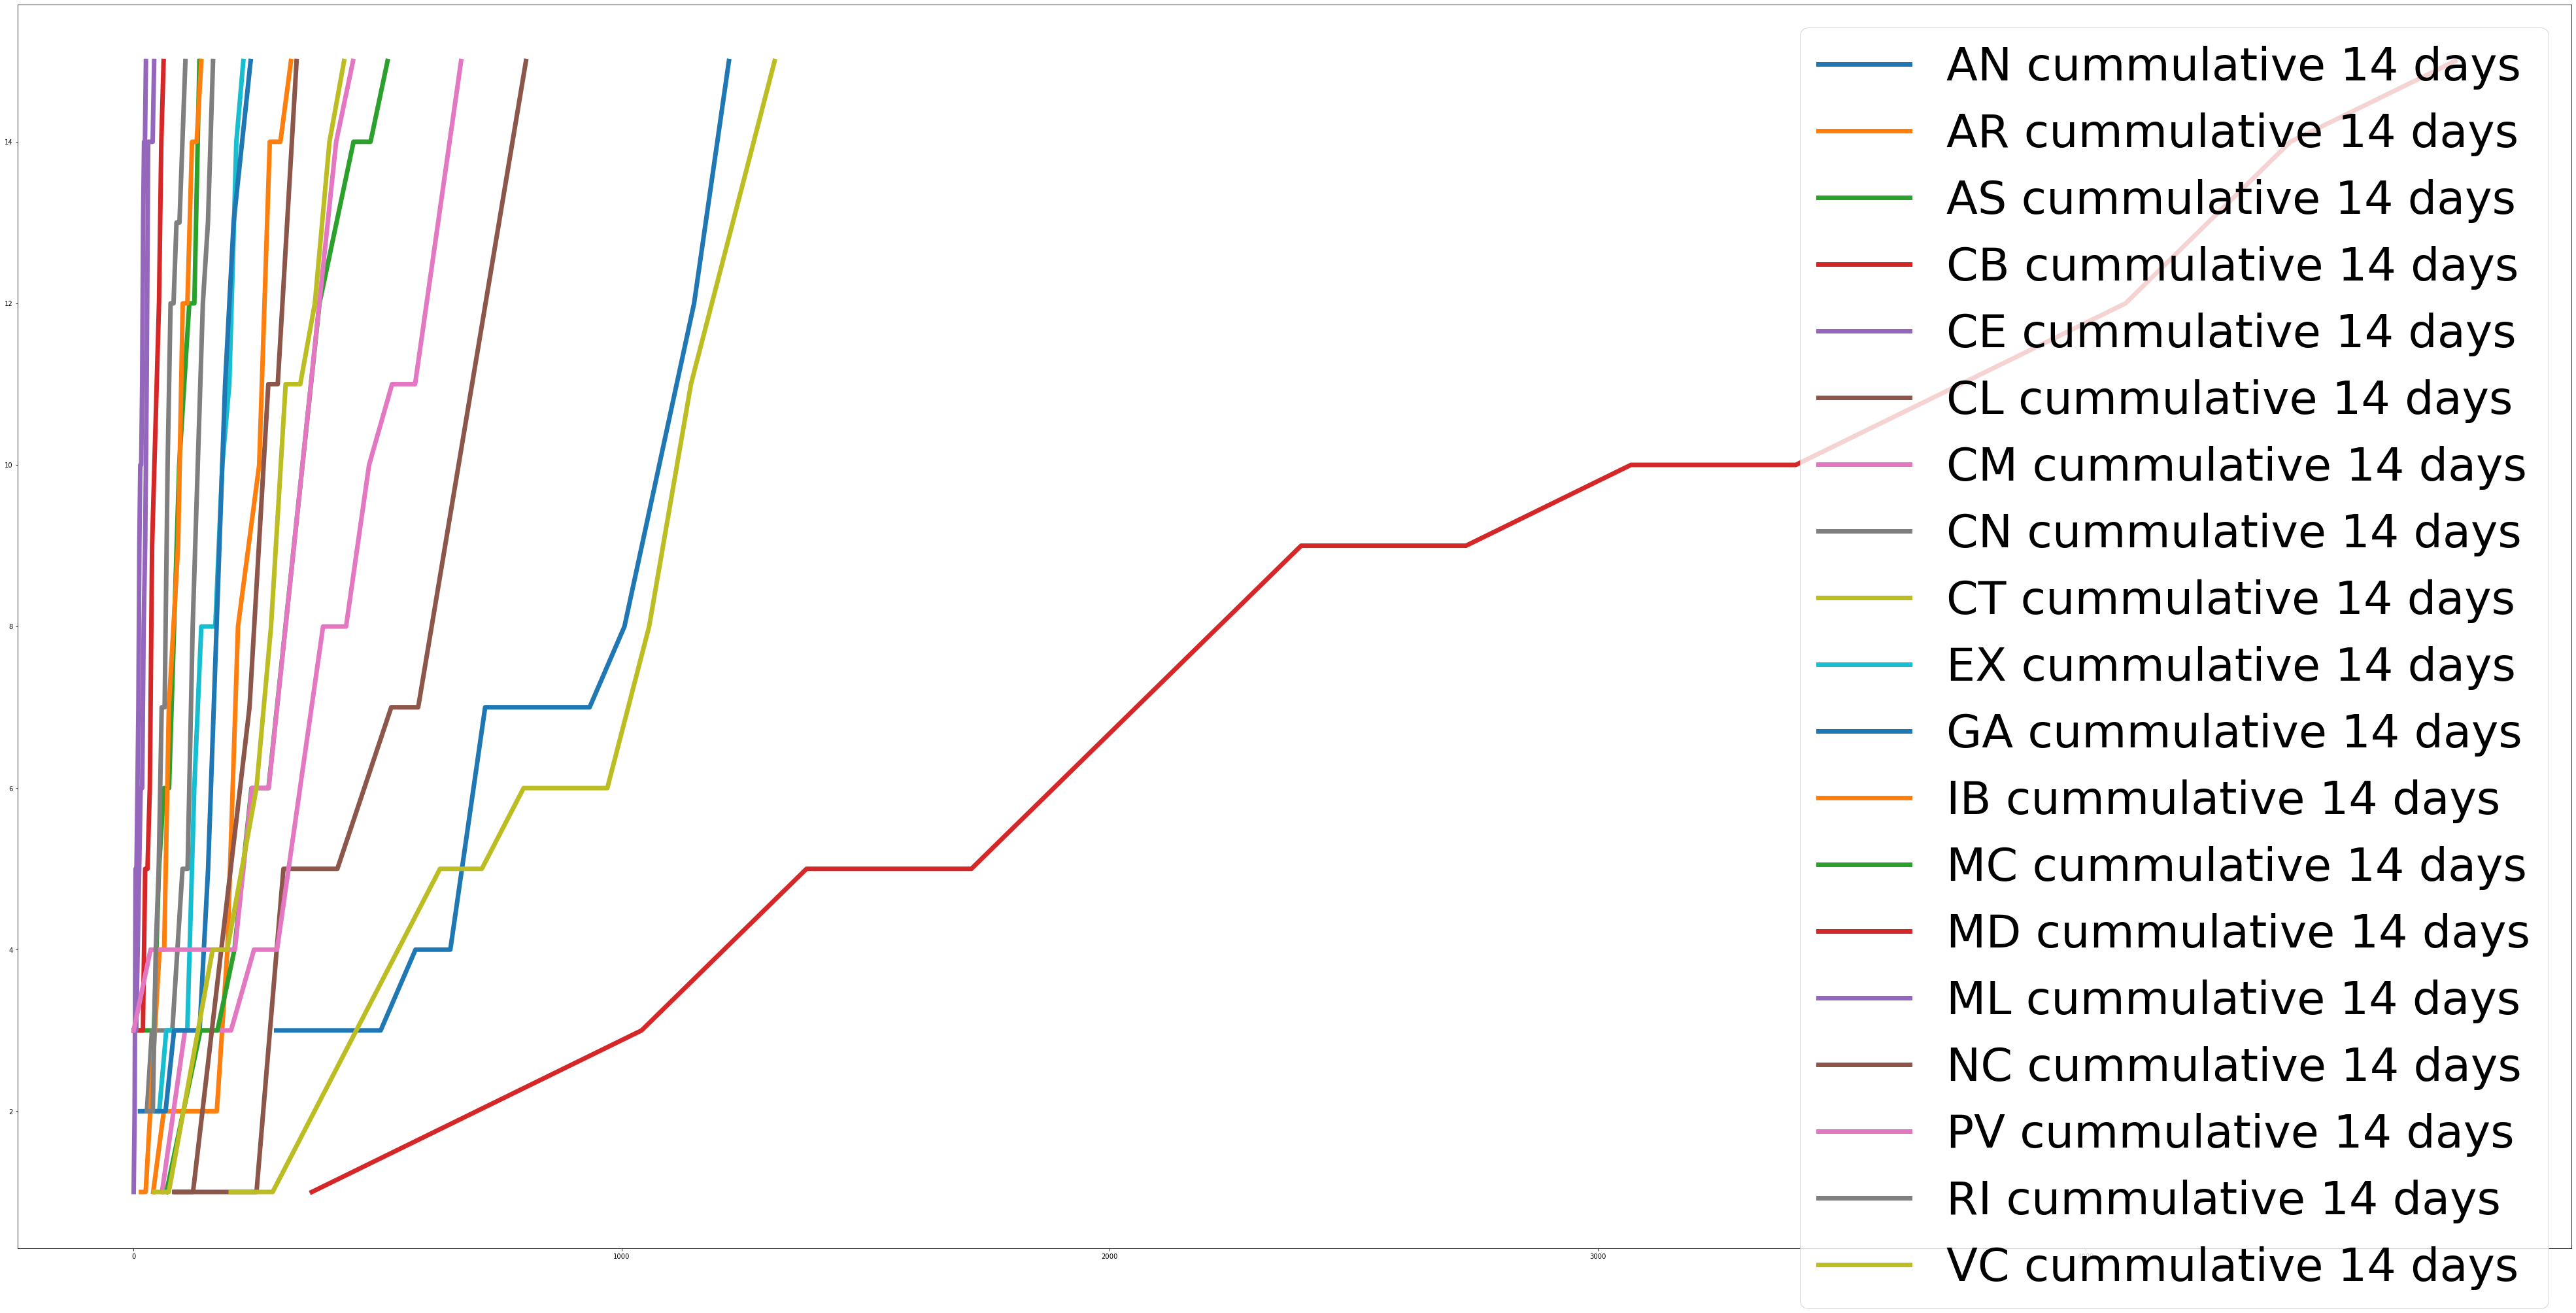

In [20]:
# Cumulative plot 14 days ARREGLARLO

l,m = fourteen(region('CN',df))
values = [i for i in range(0,len(l))]

for x in variables:
        values, base  = np.histogram(fourteen(region(x,df))[1], bins = 14)
        cumulative = np.cumsum(values)
        plt.plot(base[:-1], cumulative,linewidth=7.0,label = x +' cummulative 14 days')
        plt.legend(fontsize = 70)


In [21]:
# Suavizar curvas
# 1 Arreglar cumulative
# 2 añadir tabla de poblaciones
# 3 graficar incidencia por cada 100000 habs
# Indexar fechas https://stackoverflow.com/questions/25040291/how-to-do-interpolation-on-datetime-and-float
# graficar UCIS
# graficar presión hospitalaria